# UWAGA #
Ten plik to kopia pliku demo.ipynb dla wygenerowanej bazy testowej.
Warto zaznaczyć że:
- Baza testowa ma 300 wejść, a nie 20,000 jak w treści zadania, ponieważ plik opisujący 20,000 leków waży 5GB i nie można go spushować na githuba.
- Wykresy prezentowane poniżej były zaprojektowane dla bazy 100 leków, dla bazy trzykrotnie więszkej mogą być nieczytelne. (W szczególności wyświetlenie trzystu nazw na jednym obrazku nigdy nie będzie czytelne)
- Poza rozmiarem bazy, niektóre wykresy mogą nie mieć sensu ze względu na to że wartości wygenerowane są kopiami innych leków różniącymi się tylko ID, co może powodować patologiczne sytuacje.

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
xml_file = "data/drugbank_partial_and_generated.xml"

1) Utworzyć ramkę danych, która dla każdego leku zawiera następujące informacje: unikalny
identyfikator leku w bazie DrugBank, nazwę leku, jego typ, opis, postać w jakiej dany lek
występuje, wskazania, mechanizm działania oraz informacje z jakimi pokarmami dany lek
wchodzi w interakcje.

In [17]:
from DrugBankAnalyze.DrugSummary import drug_summary
display(drug_summary(xml_file).sample(5))
display(drug_summary(xml_file).shape)

,DrugBank ID,Name,Type,Description,State,Indication,Mechanism of Action,Food Interactions
94,DB00103,Agalsidase beta,biotech,Agalsidase beta is a recombinant human α-galac...,liquid,Agalsidase beta is indicated in the treatment ...,α-galactosidase A is uptaken by cells via the ...,{}
111,DB00120,Collagenase clostridium histolyticum,biotech,Collagenase clostridium histolyticum is an enz...,solid,Collagenase clostridium histolyticum is indica...,Peyronie's disease is a fibrous lesion of the ...,{}
290,DB00299,Bivalirudin,small molecule,Bivalirudin is a synthetic 20 residue peptide ...,solid,For treatment of heparin-induced thrombocytope...,Inhibits the action of thrombin by binding bot...,{Avoid herbs and supplements with anticoagulan...
154,DB00163,Filgrastim,biotech,"Filgrastim is a short-acting recombinant, non-...",liquid,Filgrastim is indicated to decrease the incide...,Neutrophils are critical granulocytes involved...,{}
142,DB00151,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,{}


(300, 8)

2) Utworzyć ramkę danych pozwalającą na wyszukiwanie po DrugBank ID informacji o
wszystkich synonimach pod jakimi dany lek występuje. Napisać funkcję, która dla podanego
DrugBank ID utworzy i wyrysuje graf synonimów za pomocą biblioteki NetworkX. Należy
zadbać o czytelność generowanego rysunku.

{'Desulfatohirudin',
 'Hirudin variant-1',
 'Lepirudin',
 'Lepirudin recombinant',
 'R-hirudin',
 '[Leu1, Thr2]-63-desulfohirudin'}

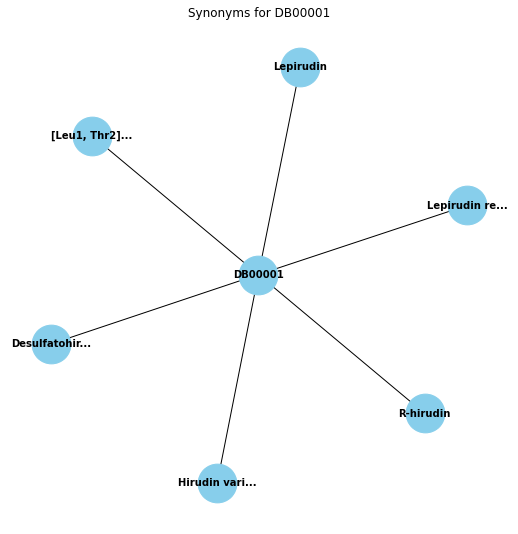

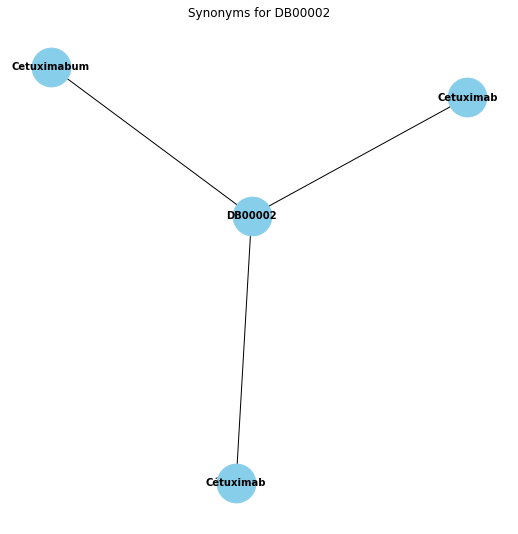

In [18]:
from DrugBankAnalyze.DrugSynonyms import get_synonyms, visualize_synonyms

display(get_synonyms(xml_file, "DB00001"))
visualize_synonyms(xml_file, "DB00001")
visualize_synonyms(xml_file, "DB00002")

3) Utworzyć ramkę danych o produktach farmaceutycznych zawierających dany lek
(substancję leczniczą). Ramka powinna zawierać informacje o ID leku, nazwie produktu,
producencie, kod w narodowym rejestrze USA (ang. *National Drug Code*), postać w jakiej
produkt występuje, sposób aplikacji, informacje o dawce, kraju i agencji rejestrującej
produkt.

In [19]:
from DrugBankAnalyze.ProductSummary import product_summary
product_summary(xml_file, "DB00001")

,Drug Id,Product name,Labeller,NDC,Form,Strength,Route,Country,Source
0,DB00001,Refludan,Bayer,50419-150,Powder,50 mg/1mL,Intravenous,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",50 mg / vial,Intravenous,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",50 mg,Intravenous,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",20 mg,Intravenous,EU,EMA


4) Utworzyć ramkę danych zawierającą informacje o wszystkich szlakach wszystkich
rodzajów, tj. sygnałowych, metabolicznych, itd., z jakimi jakikolwiek lek wchodzi w interakcje.
Podać całkowitą liczbę tych szlaków.

In [20]:
from DrugBankAnalyze.Pathways import get_pathways
display(get_pathways(xml_file))
print(f"Total number of pathways: {get_pathways(xml_file).shape[0]}")

,drugs
"blood coagulation, intrinsic pathway","{DB00266, DB00100, DB00233, DB00274, DB00299, ..."
cell surface receptor signaling pathway,"{DB00274, DB00247, DB00308, DB00105, DB00148, ..."
positive regulation of phospholipase C-activating G-protein coupled receptor signaling pathway,"{DB00148, DB00100, DB00175, DB00233, DB00274, ..."
epidermal growth factor receptor signaling pathway,"{DB00266, DB00158, DB00020, DB00061, DB00289, ..."
Fc-epsilon receptor signaling pathway,"{DB00185, DB00266, DB00158, DB00020, DB00061, ..."
...,...
platelet-derived growth factor receptor-beta signaling pathway,"{DB00102, DB00200, DB00266}"
positive regulation of cell proliferation by VEGF-activated platelet derived growth factor receptor signaling pathway,"{DB00102, DB00200, DB00266}"
positive regulation of metanephric mesenchymal cell migration by platelet-derived growth factor receptor-beta signaling pathway,"{DB00102, DB00200, DB00266}"
platelet-derived growth factor receptor-alpha signaling pathway,"{DB00102, DB00200, DB00266}"


Total number of pathways: 95


5) Dla każdego szlaku sygnałowego/metabolicznego w bazie danych podać leki, które
wchodzą z nim w interakcje. Wyniki należy przedstawić w postaci ramki danych jak i w
opracowanej przez siebie formie graficznej. Przykładem takiej grafiki może być graf
dwudzielny, gdzie dwa rodzaje wierzchołków to szlaki sygnałowe i leki, a poszczególne
krawędzie reprezentują interakcję danego leku z danym szlakiem sygnałowym. Należy
zadbać o czytelność i atrakcyjność prezentacji graficznej.

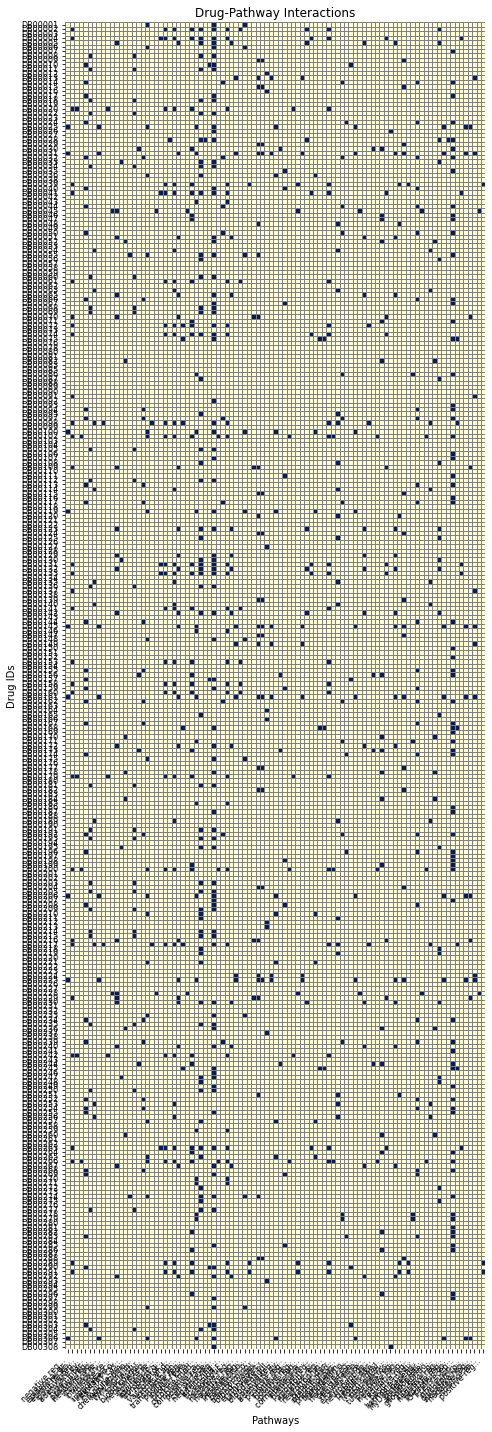

In [21]:
from DrugBankAnalyze.Pathways import visualise_drug_pathway_interactions
visualise_drug_pathway_interactions(xml_file)

6) Dla każdego leku w bazie danych podać liczbę szlaków, z którymi dany lek wchodzi w
interakcje. Przedstawić wyniki w postaci histogramu z odpowiednio opisanymi osiami.

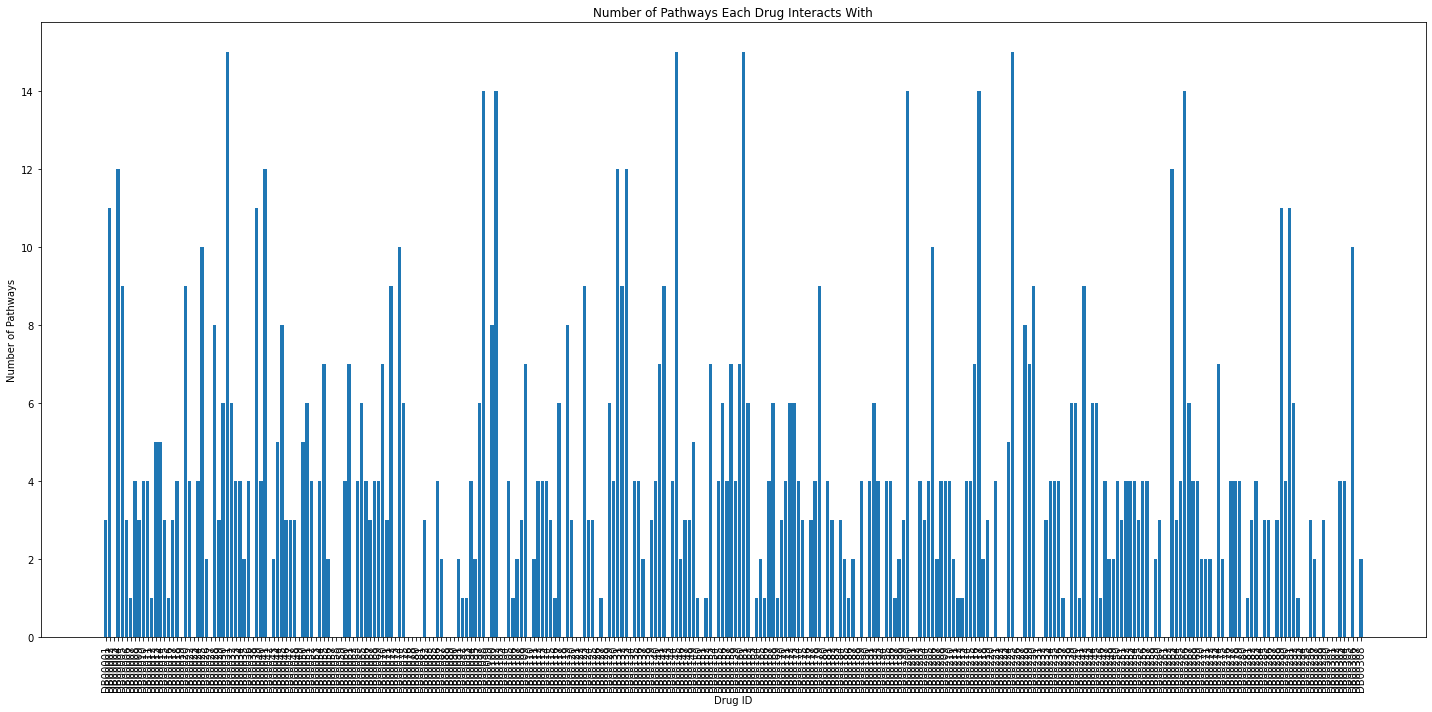

In [22]:
from DrugBankAnalyze.Pathways import number_of_pathways_histogram
number_of_pathways_histogram(xml_file)

7) Utworzyć ramkę danych zawierającą informacje o białkach, z którymi poszczególne leki
wchodzą w interakcje. Białka te to tzw. targety. Ramka danych powinna zawierać
przynajmniej DrugBank ID targetu, informację o zewnętrznej bazie danych (ang. *source*,
np. Swiss-Prot), identyfikator w zewnętrznej bazie danych, nazwę polipeptydu, nazwę genu
kodującego polipeptyd, identyfikator genu GenAtlas ID, numer chromosomu, umiejscowienie
w komórce.

In [23]:
from DrugBankAnalyze.Targets import get_targets
display(get_targets(xml_file))

,DrugBank ID,Source,External ID,Name,Gene Name,GenAtlas ID,Chromosome,Cell Location
0,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...
135,BE0000205,Swiss-Prot,P09619,Platelet-derived growth factor receptor beta,PDGFRB,PDGFRB,5,Cell membrane
136,BE0000852,Swiss-Prot,P16234,Platelet-derived growth factor receptor alpha,PDGFRA,PDGFRA,4,Cell membrane
137,BE0000910,Swiss-Prot,P01023,Alpha-2-macroglobulin,A2M,A2M,12,Secreted
138,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane


8) Utworzyć wykres kołowy prezentujący procentowe występowanie targetów w różnych
częściach komórki.

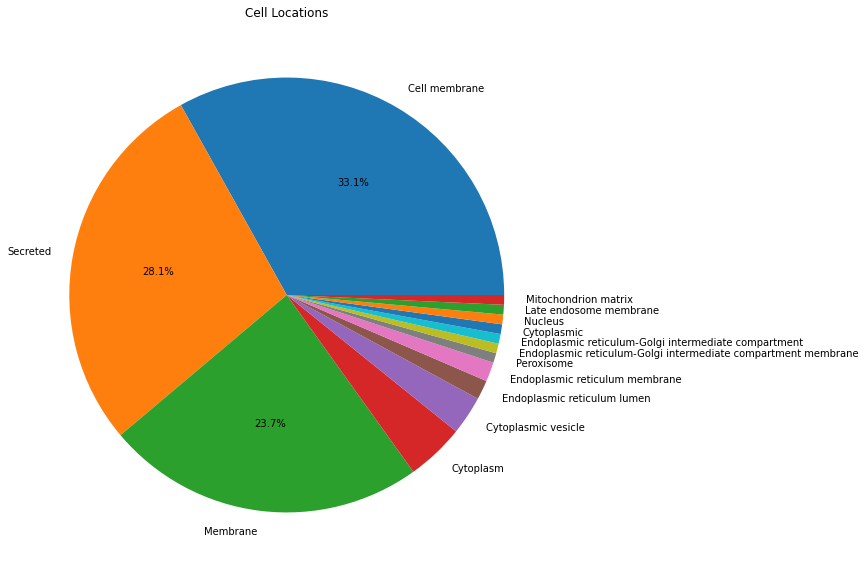

In [24]:
from DrugBankAnalyze.Targets import target_cell_location_pie_chart
target_cell_location_pie_chart(get_targets(xml_file))

9) Utworzyć ramkę danych, pokazującą ile leków zostało zatwierdzonych, wycofanych, ile
jest w fazie eksperymentalnej (ang. *experimental* lub *investigational*) i dopuszczonych w
leczeniu zwierząt. Przedstawić te dane na wykresie kołowym. Podać liczbę zatwierdzonych
leków, które nie zostały wycofane.

,id,approved,withdrawn,experimental,vet_approved
274,DB00283,True,False,False,True
267,DB00276,True,False,False,False
147,DB00156,True,False,True,False
201,DB00210,True,False,False,False
171,DB00180,True,False,True,False


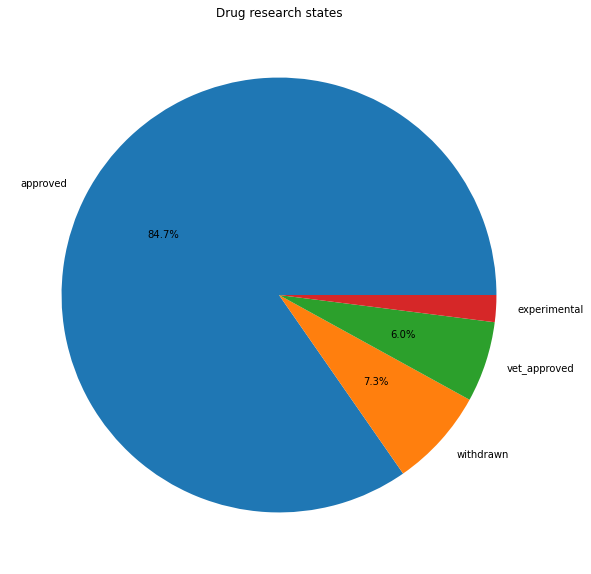

Number of approved and not withdrawn drugs: 272


In [25]:
from DrugBankAnalyze.ResearchStates import get_research_states, research_state_pie_chart
df = get_research_states(xml_file)
display(df.sample(5))
research_state_pie_chart(xml_file)

print(f"Number of approved and not withdrawn drugs: {df[df['approved'] & ~df['withdrawn']].shape[0]}")

10) Utworzyć ramkę danych zawierającą informacje dotyczące potencjalnych interakcji
danego leku z innymi lekami.

In [26]:
from DrugBankAnalyze.DrugInteractions import get_drug_interactions
display(get_drug_interactions(xml_file, "DB00001"))

,id,name,description
0,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
1,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
2,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
3,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
4,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...
...,...,...,...
647,DB09422,Soybean oil,The therapeutic efficacy of Lepirudin can be d...
648,DB09567,Olive oil,The therapeutic efficacy of Lepirudin can be d...
649,DB15434,Mosunetuzumab,The risk or severity of bleeding can be increa...
650,DB17472,Pirtobrutinib,The risk or severity of bleeding can be increa...


11) Opracować według własnego pomysłu graficzną prezentację zawierającą informacje o
konkretnym genie lub genach, substancjach leczniczych, które z tym genem/genami
wchodzą w interakcje, oraz produktach farmaceutycznych, które zawierają daną substancję
leczniczą. Wybór dotyczący tego, czy prezentacja graficzna jest realizowana dla
konkretnego genu, czy wszystkich genów jednocześnie pozostawiamy Państwa decyzji.
Przy dokonywaniu wyboru należy kierować się czytelnością i atrakcyjnością prezentacji
graficznej.

,drug_id,drug_name,products
0,DB00001,Lepirudin,{Refludan}
1,DB00006,Bivalirudin,"{Bivalirudin, Angiox, Angiomax, Bivalirudin in..."
2,DB00055,Drotrecogin alfa,"{Xigris, Xigris (5mg/vial), Xigris (20mg/vial)}"
3,DB00100,Coagulation Factor IX (Recombinant),"{Rebinyn, Benefix - (250iu), BeneFIX, Benefix ..."
4,DB00119,Coagulation Factor IX (Recombinant),"{Rebinyn, Benefix - (250iu), BeneFIX, Benefix ..."
5,DB00148,Lepirudin,{Refludan}
6,DB00175,Bivalirudin,"{Bivalirudin, Angiox, Angiomax, Bivalirudin in..."
7,DB00233,Lepirudin,{Refludan}
8,DB00274,Drotrecogin alfa,"{Xigris, Xigris (5mg/vial), Xigris (20mg/vial)}"
9,DB00299,Bivalirudin,"{Bivalirudin, Angiox, Angiomax, Bivalirudin in..."


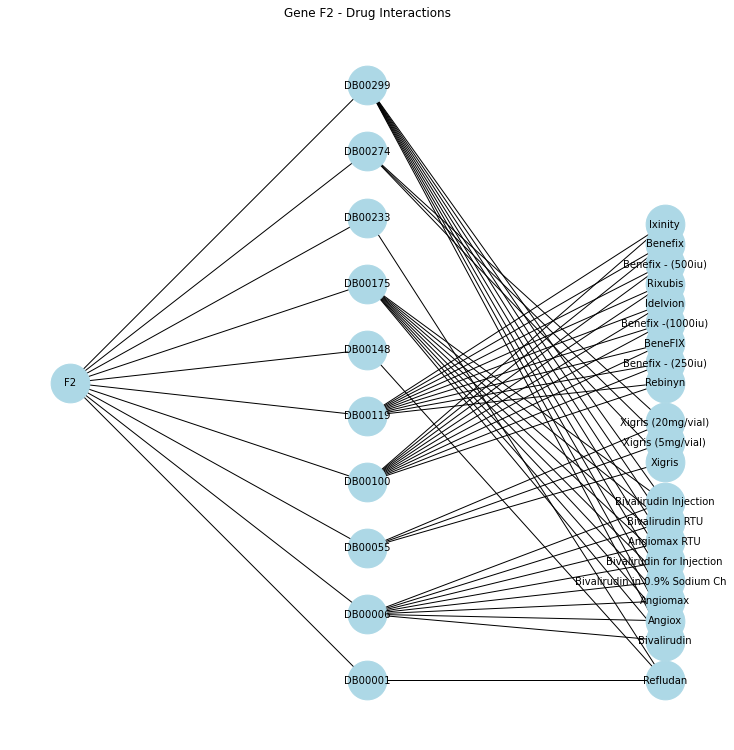

In [27]:
from DrugBankAnalyze.GeneInteractions import get_gene_drug_interactions, gene_drug_interaction_graph
display(get_gene_drug_interactions(xml_file, "F2"))
gene_drug_interaction_graph(xml_file, "F2")

12) Zaproponować własną analizę i prezentację danych dotyczących leków. Można w tym
celu pozyskiwać dodatkowe informacje z innych biomedycznych i bioinformatycznych baz
danych dostępnych online. Należy jednak upewnić się, czy dana baza danych pozwala na
zautomatyzowane pobieranie danych przez program. Na przykład baza danych GeneCards
wprost tego zabrania, co zostało na czerwono podkreślone na tej stronie. Przykładowe bazy
danych to: UniProt (https://www.uniprot.org/), Small Molecule Pathway Database
(https://smpdb.ca/), The Human Protein Atlas (https://www.proteinatlas.org/).

Zdecydowałem się pokazać średnie ceny leków za "jednorazową" dawkę względem stanu w którym występują.
W oryginalnej bazie danych nie ma wartości "cena za jednorazową dawkę", musiałem tą wartość w jakiś sposób wyliczyć/oszacować, co nie było dla wszystkich leków możliwe, ale dla większości się udało.

Warto zaznaczyć, że w ramce danych występują czasami bardzo duże liczby (rzędu kilku tysięcy dolarów), które mogą wydawać się błędem w szacowaniu (i zapewne niektóre z nich są),
ale upewniłem się ręcznie dla kilku z nich że są prawdziwe (w szczególności leki na raka są bardzo drogie).

Wyniki przedstawiłem w postaci diagramu pudełkowego na logarytmicznej skali, na którym widać że połowa leków płynnych jest w przedziale kosztowym między 100, a 1000 dolarów,
podczas gdy przedział dla stałych leków jest znacznie szerszy, od kilku do tysiąca dolarów. Medianę natomiast mają praktycznie taką samą, około 300 dolarów.

,DrugBank ID,Name,State,Average price per serving
175,DB00184,Pegvisomant,liquid,156.283333
87,DB00094,Urofollitropin,liquid,98.850000
114,DB00123,Etanercept,liquid,369.555000
178,DB00187,Oxytocin,liquid,9.840000
276,DB00285,Vasopressin,solid,2.880000


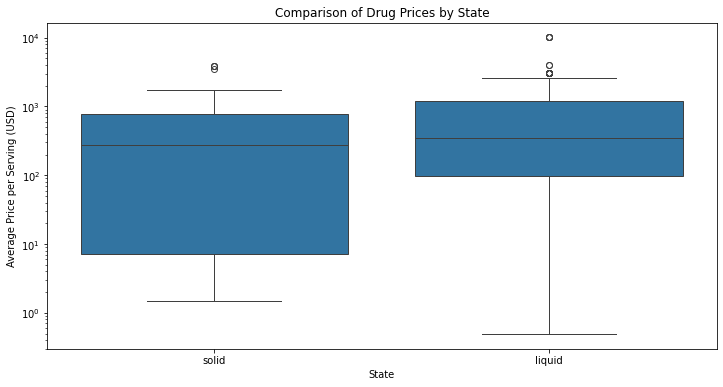

In [28]:
from DrugBankAnalyze.Prices import get_prices, plot_prices
display(get_prices(xml_file).sample(5))
plot_prices(xml_file)